In [3]:
import scipy.stats
import pandas as pd
from matplotlib import pyplot
import math
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [325]:
# This code block is only if you want to use the pre-processed dataset. In this case it is useless.

labels = 'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num'
with open('/Users/laurendelong/Desktop/processed.cleveland.data', 'rb') as data, open('/Users/laurendelong/Desktop/UCIHeart.csv', 'w') as output:
    print(labels, file=output, sep='\t')
    for line in data:
        line = line.decode('utf-8')
        print(line, file=output, sep='\t')

In [6]:
# Here I write the data I need into several different csvs so that I can read them all in separately as a dataframe.
# There is probably a more elegant, space efficient way to accomplish this, so please let me know if you write better code

with open('/Users/laurendelong/Desktop/cleveland.data', 'rb') as data, open('/Users/laurendelong/Desktop/test.csv', 'w') as test, open('/Users/laurendelong/Desktop/test2.csv', 'w') as test2, open('/Users/laurendelong/Desktop/test3.csv', 'w') as test3, open('/Users/laurendelong/Desktop/test4.csv', 'w') as test4, open('/Users/laurendelong/Desktop/test5.csv', 'w') as test5:
    for count, line in enumerate(data,start=1):
        if (count-2) % 10 == 0:
            line2 = line.decode('utf-8')
            line2 = line2.split()
            # cholesterol, cigs, cp
            if int(line2[6]) == 0:
                print(float(line2[4]),0,float(line2[1]),file=test2, sep=',')
            elif int(line2[6]) > 0:
                print(float(line2[4]),1,float(line2[1]),file=test2, sep=',')
            else:
                print(float(line2[4]),-9,float(line2[1]),file=test2, sep=',')
        if (count-1) % 10 == 0:
            line1 = line.decode('utf-8')
            line1 = line1.split()
            # patientID, age, sex, 
            print(line1[0],line1[2],line1[3], file=test, sep=',')
        if (count-5) % 10 == 0:
            line5 = line.decode('utf-8')
            line5 = line5.split()
            # trestbpd
            print(float(line5[5]), file=test3, sep=',')
        if (count-6) % 10 == 0:
            line6 = line.decode('utf-8')
            line6 = line6.split()
            # oldpeak
            print(float(line6[0]), file=test4, sep=',')
        if (count-3) % 10 == 0:
            line3 = line.decode('utf-8')
            line3 = line3.split()
            # restec 
            print(float(line3[3]), file=test5, sep=',')

# The code will error out as it approaches the bottom of the un-processed data. Doesn't matter.
# The un-processed data becomes wacky and uninterpretable at the end, so the code only errors after it has done what we want.

IndexError: list index out of range

In [7]:
# Here I use pandas to write into a df.

dfs = []
for filename in ['/Users/laurendelong/Desktop/test.csv',
                 '/Users/laurendelong/Desktop/test2.csv',
                 '/Users/laurendelong/Desktop/test3.csv',
                 '/Users/laurendelong/Desktop/test4.csv',
                 '/Users/laurendelong/Desktop/test5.csv']:
    dfs.append(pd.read_csv(filename,header=None))
    
big_frame = pd.concat(dfs,sort=False,axis=1)

big_frame.columns = ['patientID','age','sex','cholesterol','smoke','cp','trestbpd','oldpeak','restecg']
# Get rid of patient IDs that don't make sense
big_frame = big_frame.loc[big_frame['patientID'] != -9]

big_frame

,patientID,age,sex,cholesterol,smoke,cp,trestbpd,oldpeak,restecg
0,1,63,1,233.0,1,1.0,85.0,2.3,2.0
1,2,67,1,286.0,1,4.0,90.0,1.5,2.0
2,3,67,1,229.0,1,4.0,80.0,2.6,2.0
3,4,37,1,250.0,0,3.0,78.0,3.5,0.0
4,6,41,0,204.0,0,2.0,86.0,1.4,2.0
5,7,56,1,236.0,1,2.0,75.0,0.8,0.0
6,8,62,0,268.0,0,4.0,100.0,3.6,2.0
7,9,57,0,354.0,0,4.0,80.0,0.6,0.0
8,10,63,1,254.0,0,4.0,105.0,1.4,2.0
9,11,53,1,203.0,1,4.0,100.0,3.1,2.0


# Is there a significant difference in cholesterol levels between smokers and non-smokers?

In [328]:
# Get rid of misrecorded and missing data
big_frame = big_frame.loc[big_frame['cholesterol'] < 1000]
smoke = big_frame.loc[big_frame['smoke'] != -9]
# Get the cholesterol column
chol = smoke['cholesterol']

### We want to do a t test, but first we need to check the assumptions.

# Shapiro- Wilk Test for Normal Distribution

## Null Hypothesis is that the data are normally distributed

In [336]:
# normality test
stat, p = shapiro(chol)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.942, p=0.000
Sample does not look Gaussian (reject H0)


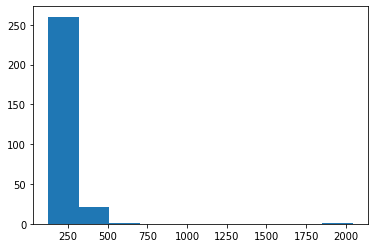

In [289]:
# histogram plot
pyplot.hist(chol)
pyplot.show()

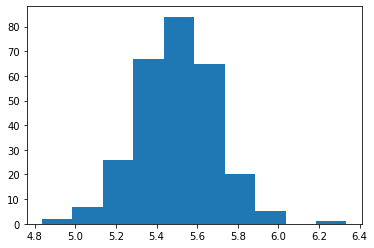

In [337]:
# Transform the data based on what it looks like
chol_ln = np.log(chol)
pyplot.hist(chol_ln)
pyplot.show()

In [338]:
# Check again for normality- normality test
stat, p = shapiro(chol_ln)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.991, p=0.088
Sample looks Gaussian (fail to reject H0)


### Now that there is a normal distribution, we should check for equal variances between smokers and non-smokers.

In [334]:
#Subset smokers and nonsmokers
smokers = smoke[smoke['smoke'] == 1]
non_smokers = smoke.loc[smoke['smoke'] == 0]

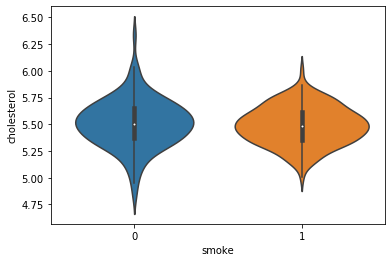

In [342]:
# Make sure you are checking variance with your transformed data (here I took the natural log)
sns.violinplot(x='smoke', y=np.log(smoke['cholesterol']), data=smoke)

# Levene's Test for Equal Variances

### Null Hypothesis: Variances are Equal

In [335]:
scipy.stats.levene(np.log(smokers['cholesterol']),np.log(non_smokers['cholesterol']))

LeveneResult(statistic=3.2583554496533598, pvalue=0.07215405865704938)

### Since p-value is greater than 0.05, we fail to reject the Null and say that there is insufficient evidence that the variances are not equal (variances are most likely equal).

### We can proceed with Student's t test.

# Student's T Test

## Assumes Normal Distribution and Equal Variances

### The Null Hypothesis is that there is no difference in cholesterol between smokers and non-smokers
### The Alternate is that there is a difference in cholesterol between smokers and non-smokers

In [296]:
# Again, make sure you are doing t test with transformed data. NOT THE untransformed data.
scipy.stats.ttest_ind(np.log(smokers['cholesterol']),np.log(non_smokers['cholesterol']), equal_var = True)

Ttest_indResult(statistic=-0.8453061902483381, pvalue=0.39867475928544927)

### Because p > 0.05, we should not reject the null; there is insufficient evidence to say that there is a significant difference in cholesterol between smokers and non-smokers.

# Fisher's Exact Test

## Are there more male than female smokers?

### Assumptions:
### -The marginal values are fixed
### -There is no association between categorical values

## Null Hypothesis: There is no difference / no overrepresentation

### Now let's see if there are significantly more male than female smokers.

In [343]:
# Create a contingency table
tab = pd.crosstab(smoke['smoke'], smoke['sex'])
print(tab)

sex     0    1
smoke         
0      58   57
1      32  130


In [344]:
odds, pvalue = scipy.stats.fisher_exact(tab)
print("p value: " + str(pvalue))

p value: 1.2986114955096832e-07


### Because p value < 0.05, we can reject the null hypothesis that there is no difference or overrepresentation.

### With smokers represented as 1 (non-smokers are 0) and males represented as 1 (females are 0), we can see that there are significantly more male smokers.

# Permutation Test

### Is there a significant correlation between ST Depression induced by exercise relative to rest (oldpeak) and resting blood pressure (trestbpd)?

## Null Hypothesis is that the Pearson Correlation coefficient calculated is equally likely to be achieved using another permutation of the data

In [299]:
#Get rid of the row with Nans
no_Nan = big_frame.loc[big_frame['cholesterol'] < 1000]
x = no_Nan['oldpeak']
y = no_Nan['trestbpd']

Text(0, 0.5, 'Resting BP')

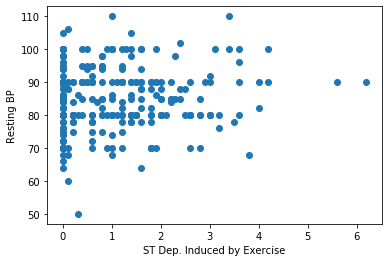

In [300]:
pyplot.scatter(x,y)
pyplot.xlabel("ST Dep. Induced by Exercise")
pyplot.ylabel("Resting BP")

It definitely does not look like there is any significant linear correlation, but let's check anyways.

In [301]:
value = np.corrcoef(x,y)[1][0]
print('Observed pearson R: %.2f' % value)

Observed pearson R: 0.09


In [302]:
def pearson_perm(x, y, n):
    value = np.corrcoef(x,y)[1][0]
    total = 0
    for i in range(0,n):
        y_new = np.random.permutation(y.values)
        rsq = np.corrcoef(x,y_new)[1][0]
        if rsq > value:
            total += 1
    return total / n

In [303]:
print(pearson_perm(x,y,10000))

0.0631


### Because p > 0.05, we can not reject the null hypothesis. The observed Pearson correlation is equally as likely to occur by another permutation (and therefore by chance).

# Chi-Squared Test of Independence

## Is there a significant association between restecg and cp?

## Tests whether there is a significant association between two variables

$$\chi^2 = \sum \frac {(O - E)^2}{E}$$

### Null Hypothesis: There is no association between the two variables

## Assumptions:
- Data should be frequencies or counts of cases
- Each level is mutually exclusive
- One data point per category per patient
- Two groups must be independent
- Two variables measured as categories

## About the Data:

### restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
### cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

In [304]:
tab = pd.crosstab(no_Nan['restecg'], no_Nan['cp'])
print(tab)

cp       1.0  2.0  3.0  4.0
restecg                    
0.0        8   26   48   56
1.0        0    0    1    1
2.0       14   17   35   76


In [305]:
chi, pvalue, dof, expected = scipy.stats.chi2_contingency(tab)
print(chi, pvalue)

9.288162392675268 0.1580087962231584


### Since p > 0.05, we can not reject the null hypothesis. There is insufficient evidence that there exists a significant association between the resting electrocardiographic results and chest pain type.